# $\Large{\textbf{PROYECTO 2: MODELOS DE REGRESIÓN}}$

# **Econometría I**

## Marcos García Morales
## Eduardo Tomás Leyva Díaz


---
# $\color{blue}{\textbf{LIBRERÍAS}}$

El primer paso es activar las librerías que contienen todas las funciones a utilizar durante el desarrollo de este proyecto


In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import requests

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Procesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Verificar supuestos
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import anderson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera

# Polinomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Configuración de matplotlib
plt.rcParams['image.cmap']="bwr"
plt.rcParams['figure.dpi']="100"
plt.rcParams['savefig.bbox']="tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

---
# $\color{blue}{\textbf{BASE DE DATOS}}$


### **Enlace de descarga**

 https://www.kaggle.com/datasets/govindaramsriram/car-insurance-premium-dataset

### **Variables predictoras y observaciones**

El objetivo de este proyecto es establecer la relación de una variable predictora siendo esta el valor de la **Prima del Seguro de Auto** con.
otras seis variables predicotras cuantitativas:

* Edad del conductor
* Años de experiencia del conductor
* Accidentes previos
* Kilometraje anual (En mil kilómetros)
* Año de manufactura del auto
* Edad del auto

### **Descripción**

- **Edad del conductor**: La edad del individuo, que puede influir en los riesgos para la salud o cognitiva, causando problemas al conducir y por ende a los cargos del seguro.  
- **Años de experiencia**: La experiencia del individuo. Esto puede usarse para analizar cómo difieren los cargos del seguro según su tiempo tras el volante.  
- **Accidentes previos**: Una medida de los accidentes basada en el número pasado de estos. Ayuda a evaluar la fiabilidad general al manejar de un individuo y el riesgo que conlleva tener varios accidentes, lo que puede afectar los costos del seguro.
- **Kilometraje anual**: El número de kilómetros manejados anualmente que tiene el individuo. Esto puede ser relevante para los planes de seguro, más tiempo manejando, más posibilidades de tener un accidente.
- **Año de manufactura del auto**: El año de fabricación del auto. Un auto viejo puede conducir a mayores riesgos al conducir, lo que se refleja en primas de seguro más altas.
- **Edad del auto**: Años que tiene el auto en funcionamiento. Esto puede afectar el costo del seguro según costos y políticas internas de la aseguradora.
- **Cargos**: Los gastos al automóvil que la compañía de seguros le factura a la persona. Estos se ven influenciados por factores como la edad, modelo de auto, tiempo de uso, kilometraje, y son la variable dependiente de interés en los modelos de seguros.

### **Relación actuarial**

Las aseguradoras necesitan los datos del conductor y del auto para evaluar el riesgo y determinar si aceptan la póliza. También les permiten vincular un siniestro.

- **Identificación del asegurado:** La identificación personal o el comprobante de domicilio permiten a la aseguradora verificar tu identidad y revisar que la información proporcionada es correcta.

- **Datos del vehículo:** La tarjeta de circulación, el número VIN y la carta factura son necesarios para identificar el coche que se está asegurando y determinar su valor.

- **Evaluación de riesgos:** La información personal y del vehículo ayudan a la aseguradora a evaluar el nivel de riesgo. Por ejemplo, los seguros para mujeres son más económicos porque suelen tener menos accidentes. Asimismo, factores como el domicilio y la edad influyen en el costo del seguro.

Después se procede a cargar la base de datos y guardar la información en un Data Frame.

In [ ]:
# Cargar la base de Datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Frame
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Econometría I/car_insurance_premium_dataset.csv")
datos

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
...,...,...,...,...,...,...,...
995,23,5,3,22,2020,5,500.00
996,43,8,3,17,2023,2,494.55
997,21,3,5,19,1998,27,506.05
998,36,18,1,23,2011,14,491.45


In [ ]:
# Renombrando las columnas
datos.columns = ['Edad', 'Experiencia', 'Accidentes_Previos','Kilometraje_Anual',
                 'Año_Manufactura','Años_Uso','Prima_Seguro']
print(datos.columns)

Index(['Edad', 'Experiencia', 'Accidentes_Previos', 'Kilometraje_Anual',
       'Año_Manufactura', 'Años_Uso', 'Prima_Seguro'],
      dtype='object')


---
# $\color{blue}{\textbf{ANÁLISIS EXPLORATORIO}}$

## **RESUMEN**

Como primer paso se generará un pequeño resumen estadístico con el objetivo de familiarizarnos con la base de datos calculando la media, desviación estándar, cuantiles, valores máximos y mínimos de cada variable.

In [ ]:
datos.describe()

,Edad,Experiencia,Accidentes_Previos,Kilometraje_Anual,Año_Manufactura,Años_Uso,Prima_Seguro
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


Algunos aspectos que valen la pena resaltar de esta descripción son:
* La **edad media** de estos conductores es de 41 años aproximadamente.
* El **75%** de los conductores cuentan con más de 6 años de experiencia conduciendo.
* La variable de **Accidentes Previos** solo toma valores enteros entre 0 y 5 años.
* El **año promedio**. de manufactura es de 2007
* Solo el **25%** de los autos se han estado funcionando durante más de 26 años.
* El costo de la **prima del seguro** se ubica entre $477 y $508.


## **CORRELACIÓN**

Es importante revisar el grado de correlación que tienen las varibales, recordando que valores cercanos a 1 indican una correlación positiva y valores negativos cercanos a -1 una correlación negativa. Para esto se obtendrá la **Matriz de Correlación** y además se va a presentar un **Mapa de Calor** que permite visualizar esto de mejor manera.

In [ ]:
datos.corr()

,Edad,Experiencia,Accidentes_Previos,Kilometraje_Anual,Año_Manufactura,Años_Uso,Prima_Seguro
Edad,1.000000,0.607890,0.031819,0.056822,0.008187,-0.008187,-0.776848
Experiencia,0.607890,1.000000,0.020837,-0.014424,-0.038194,0.038194,-0.803323
Accidentes_Previos,0.031819,0.020837,1.000000,0.007088,-0.030123,0.030123,0.410786
Kilometraje_Anual,0.056822,-0.014424,0.007088,1.000000,-0.002898,0.002898,0.022131
Año_Manufactura,0.008187,-0.038194,-0.030123,-0.002898,1.000000,-1.000000,-0.171829
Años_Uso,-0.008187,0.038194,0.030123,0.002898,-1.000000,1.000000,0.171829
Prima_Seguro,-0.776848,-0.803323,0.410786,0.022131,-0.171829,0.171829,1.000000


<Axes: >

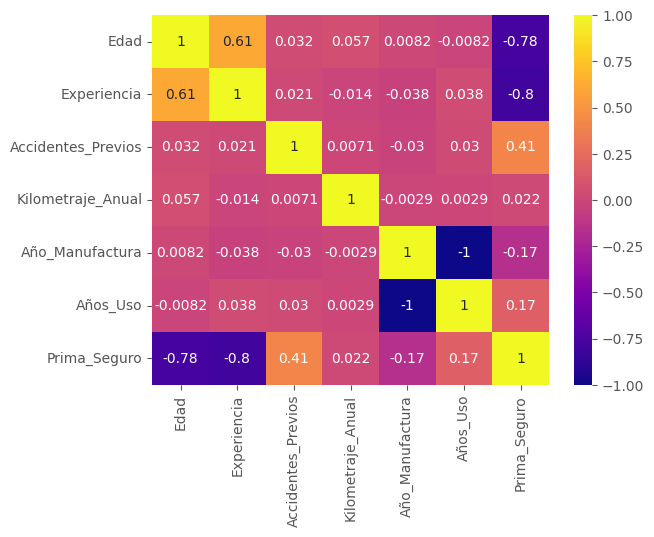

In [ ]:
# Mapa de Calor
sns.heatmap(datos.corr(),annot=True,cmap="plasma")

De quí se puede rescatar que hay una **relación negativa** fuerte entre los años de uso del auto con el año de factura ya que toma un valor de -1 (cuadro color azul fuerte), lo cual indica que el comportamiento de esta variable es inversamente proporcional (disminuye si la otra aumenta). Por otro lado, también existe una **relación positiva** meediana entre la edad y la experiencia del conductor con un valor de 0.6 .

## **PAIRPLOT**

Este tipo de gráfico acomoda los histogramas de cada variable en la diagonal y en las otras entradas viene un gráfico de dispersión para poder apreciar la relación entre las variables. Debido a que la prima del seguro es la variable de respuesta se profundizará más en la última fila del gráfico.

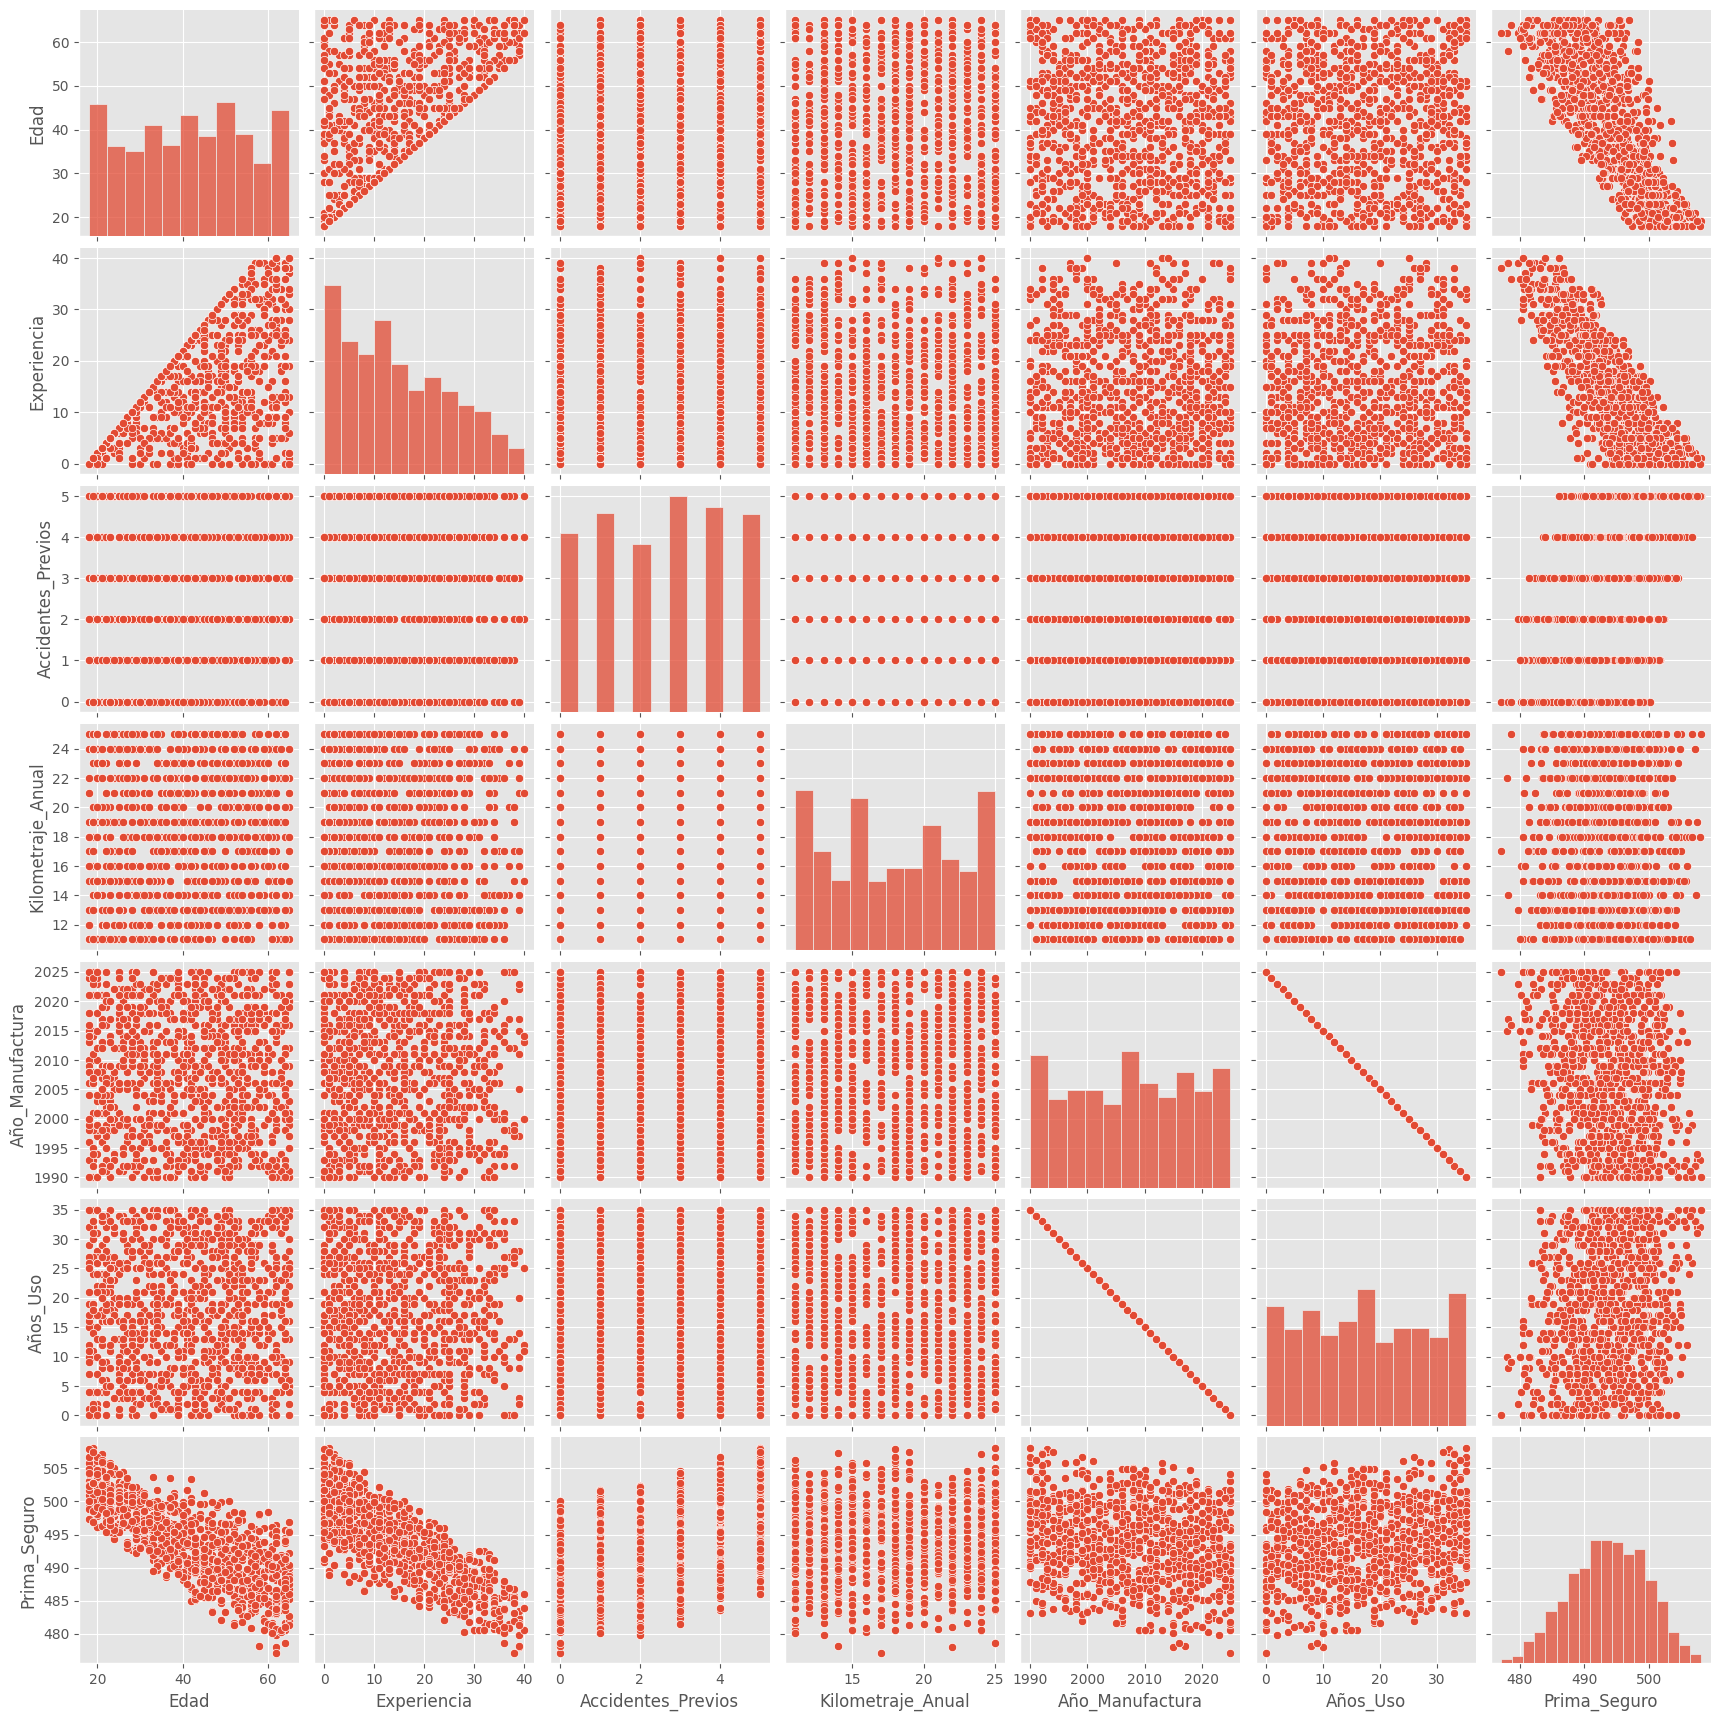

In [ ]:
sns.pairplot(datos)

De aquí es importante ver que la variable de **Accidentes Previos** solamente toma valores de 0 a 5, donde a pesar de guardar valores enteros, de cierto modo asume un comportamiento como si fuera una variable categórica.

Al ajustar un primer modelo tomando en cuenta esta variable lleva a un **r cuadrado ajustado** de prácticamente 1 donde no se cumple ningún supuesto para que el modelo sea válido y se pueda ocupar para predicciones, por lo que a continuación se presenta el análisis de otro modelo donde se elimina esta variable.

---
# $\color{blue}{\textbf{MODELO DE REGRESIÓN MÚLTIPLE}}$

El método de ajuste para los modelos de regresión lineal múltiple es similar al de regresión simple y está dado de la siguiente forma:

$ \mathbf{Y = β_0 + \beta_1 X_1 + \beta_2 X_2 + ... +  \beta_k X_k + ϵ} $

En este modelo cabe la posibilidad de que los símbolos $X_i$ representen términos de orden mayor de las variables predictoras, las cuales pueden ser cuantitativas o cualitativas.

## **AJUSTE DEL MODELO**

In [ ]:
# Se elimina la Variable "Accidentes Previos" como predictora
predictoras = datos.drop(["Prima_Seguro","Accidentes_Previos"],axis=1)
predictoras.head()

,Edad,Experiencia,Kilometraje_Anual,Año_Manufactura,Años_Uso
0,56,32,17,2002,23
1,46,19,21,2025,0
2,32,11,15,2020,5
3,60,0,19,1991,34
4,25,7,13,2005,20


In [ ]:
# La Prima del Seguro es la Variable de Respuesta
respuesta = datos['Prima_Seguro']
respuesta.head()

,Prima_Seguro
0,488.35
1,486.15
2,497.55
3,498.35
4,495.55


In [ ]:
# Datos de Prueba y de Entrenamiento
predictoras_train, predictoras_test, respuesta_train, respuesta_test = train_test_split(predictoras,respuesta, random_state=123,train_size = 0.75)
#75% para entrenamiento, 25% para prueba
df = pd.concat([predictoras_train,respuesta_train], axis=1)
print(predictoras_train.shape)
print(predictoras_test.shape)
print(respuesta_train.shape)
print(respuesta_test.shape)

(750, 5)
(250, 5)
(750,)
(250,)


In [ ]:
# MODELO DE REGRESIÓN MÚLTIPLE
predictoras_train=sm.add_constant(predictoras_train,prepend=True)  # Agregar el intercepto (B0)
reg_mult = sm.OLS(respuesta_train,predictoras_train)

reg_mult = reg_mult.fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:           Prima_Seguro   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     808.0
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          3.34e-269
Time:                        16:01:01   Log-Likelihood:                -1767.0
No. Observations:                 750   AIC:                             3544.
Df Residuals:                     745   BIC:                             3567.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0003   4.34e-0

## **INTERPRETACIÓN PRUEBA GLOBAL**

Se utiliza la distribución F, en la hipótesis nula se establece que todos los coeficientes (betas) son iguales a cero, por lo que un valor-p sea menor al nivel de significancia arrojaría que existe al menos uno diferente de cero, lo cual ayudaría a poder predecir la variable de respuesta (prima del seguro).

$$ \mathbf{ H_0: B_1 = B_2 = ... = B_k = 0 \\ H_1: \text{Al menos un } B_i \ \text{es diferente de cero para } i=\{1,...,k\} }$$

Para este caso, el valor del summary del modelo de regresión pasa la prueba individual debido a que el valor-p definido como Prob (F-statistic): 3.34e-269 va a ser menor al nivel de significancia $\alpha = 0.05$ rechazando así la hipótesis nula indicando que hay al menos un coeficiente distinto de cero.

## **INTERPRETACIÓN PRUEBA INDIVIDUAL**

Una vez que el modelo pasó la prueba global del estadístico F hay que analizar de manera individual lo que ocurre con los coeficientes a través de una prueba de hipótesis usando la distribución t. Ahora se establece que el coeficiente es igual a cero y nuevamente se busca rechazar esto obteniendo un valor-p menor al nivel de significancia. De este modo, se identificarán los coeficientes que son significativos para el modelo

$$ \mathbf{ H_0: B_i= 0 \\ H_1: B_i \neq 0  \ \text{ para } i=\{1,...,k\} }$$

El summary del modelo indica que todas las variables predictoras que se utilizaron son significativas ya que siempre se obtuvo un valor-p igual al nivel de significancia $\alpha=0.05$ arrojando como resultado P>|t| = 0.000 y P>|t| = 0.014 para el Kilometraje Anual.

## **COEFICIENTE DE DETERMINACIÓN**

$r^2$ : el coeficiente de determinación de la recta de regresión, se define como la proporción de la variabilidad total de la muestra en las $y's$ explicada por el modelo de regresión, es decir

$ \mathbf{ r^2= \frac {SS_{REG}}{SST} = 1- \frac {RSS}{SST}} $

También existe otra medida que se conoce como el coeficiente de determinación ajustado, $r^2 \ \text{adj}$ que toma en cuenta el número de variables predictoras y el número de observaciones que se define como:

$ \mathbf{ r^2_{ADJ}= 1-\frac {RSS/(n-p-1)}{SST/(n-1)}}$

El summary del modelo de regresión arroja como resultados **R-squared: 0.813 y
R-squared: 0.812**, esto indica que aproximadamente hay un 81% de variabilidad explicada, lo cual se considera como un buen valor para el ajuste que tiene el modelo.

## **CONCLUSIÓN**

Este primer modelo contiene un $r^2$ moderadamente alto, con 0.81, lo que indica una buena realización de este, con un resultado realista, todas las variables fueron notablemente significativas, podemos recalcar el kilometraje actual que tuvo un valor de 0.014, el más alto del modelo, pero significante a fin de cuentas, ya que no supera el valor de alpha (0.05). Se observa una curtosis baja, lo que podría indicar que no hay normalidad en los datos, pero esto se tocará más a fondo una vez realicemos los análisis de los supuestos. Tanto el AIC y BIC son un poco bajos, lo que indican un buen ajuste del modelo y poca pérdida de información.

---
# $\color{blue}{\textbf{ANÁLISIS DE RESIDUALES}}$

En el contexto de la regresión lineal, llamamos residuos a las diferencias entre los valores de la variable dependiente observados y los valores que predecimos a partir de nuestra recta de regresión. Los residuos pueden ser graficados contra distintas variables. Es muy habitual hacerlo contra las variables independientes, más adelante se muestra un gráfico mostrando la homocestacidad del modelo.


## **GRÁFICOS**
*   Valores Ajustados
*   Histograma
*   Cuantiles




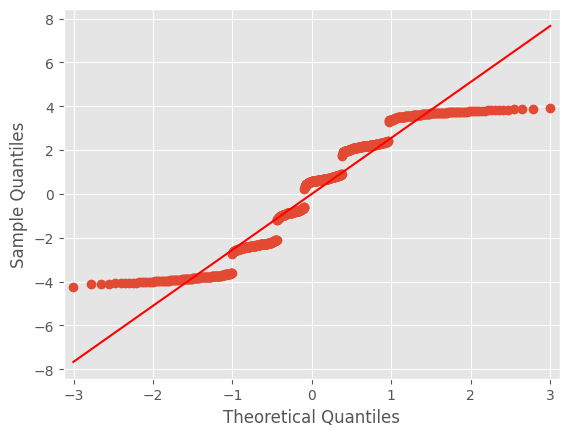

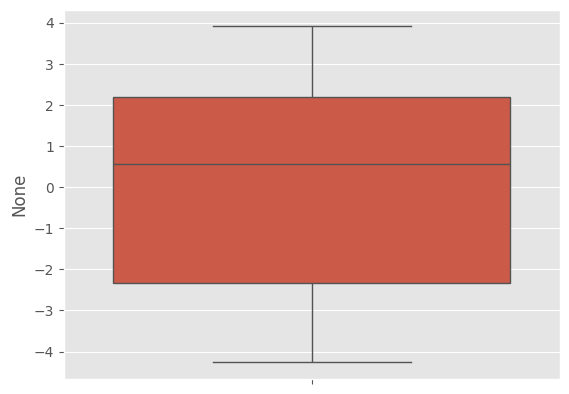

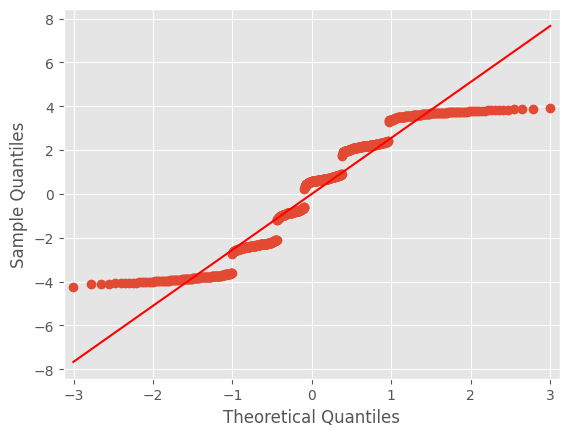

In [ ]:
# Valores Ajustados y Predicciones
resid_val =reg_mult.resid
fitted_val=reg_mult.predict()

sns.boxplot(y=resid_val)
sm.qqplot(resid_val, line='s')  # cuantiles teóricos vs empíricos

Analizando un poco los gráficos vemos que para el **BoxPlot** no hay presencia de valores atípicos o de outliers, mientras que en el **QQ-Plot** de los cuantiles teóricos, hay un poco de problemas para los extremos ya que van separando de la línea recta trazada. Sin embargo, para la parte central si se van aproximando ya que la distancia a la que se encuentran va disminuyendo.

Después se procede a comparar las predicciones del modelo con los datos reales para observar qué es lo que ocurre.

Text(0.5, 1.0, 'Valores Ajustados vs Reales')

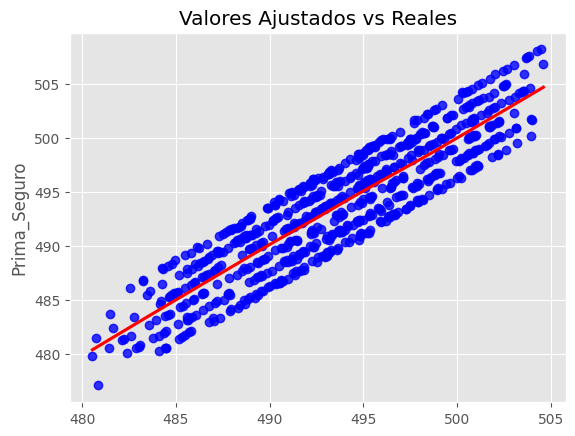

In [ ]:
sns.regplot(x=fitted_val,y=respuesta_train, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Valores Ajustados vs Reales')

De manera general se puede ver que la línea de regresión está muy cerca de los puntos, lo cual sugiere que el modelo ajusta correctamente. Al final solo se calculará el **Error Cuadrático Medio** como indicador para comparar este modelo con otros que se harán una vez que se validen los supuestos.

In [ ]:
# Error cuadrático medio
mse = mean_squared_error(reg_mult.model.endog, reg_mult.fittedvalues)
print(f"MSE: {mse:.4f}")

MSE: 6.5157


## **SUPUESTOS**

Para verificar los supuestos del modelo se busca que los errores o residuos, se distribuyan alrededor de la recta de regresión, en forma normal, con una media de cero, para ello, podemos recurrir a alguno de los varios gráficos, en este caso se usó un histograma.

1.   **Media Cero: Calcular la media.**
2.   **Homocedasticidad: Prueba de Breusch-Pagan**

$$ H_0: \ \text{La varianza de los errores es constante} \\
H_1: \ \text{La varianza de los errores NO es constante}$$

3.   **Autocorrelación: Durbin Watson**

  Si el valor del estadístico es cercano a 2 indica que no hay autocorrelación. En dado caso que $DW < 2$ es porque hay autocorrelación positiva y si $DW > 2$ se trata de autocorrelación negativa.

4.   **Normalidad: Shapiro o Jarque-Bera y Kolmogorov-Smirnov**

  $$ H_0: \ \text{La distribución de los errores es "significativamente" normal} \\
H_1: \ \text{La distribución de los errores NO es "significativamente" normal}$$


Debido a que son muchos datos también se tomará en cuenta la prueba de Kolmogorov Sminrov para la normalidad de los residuales

In [ ]:
# MEDIA DE LOS RESIDUALES
print(f"Media de los residuales: {reg_mult.resid.mean()}")
print(f"Desviación estándar de los residuales: {reg_mult.resid.std()}")

Media de los residuales: 1.9705718538413444e-15
Desviación estándar de los residuales: 2.5542866432594917


Prácticamente se obtiene 0 como resultado validando así este supuesto

Breusch-Pagan Test:
Estadístico BP: 2.2178680789720904
P-valor: 0.8182508815638913


Text(0.5, 1.0, 'Valores Ajustados vs Residuales Estandarizados')

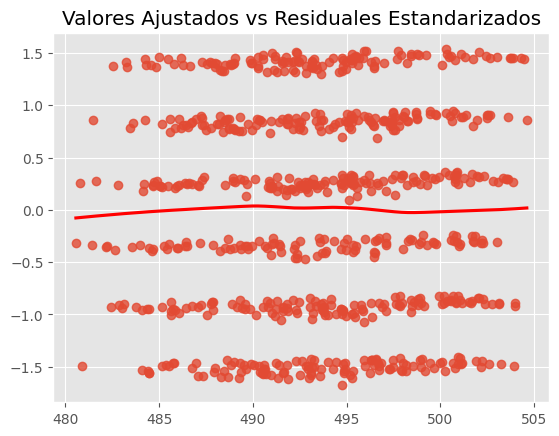

In [ ]:
# HOMOCEDASTICIDAD DE VARIANZA
bp_test = het_breuschpagan(resid_val, reg_mult.model.exog)
print("Breusch-Pagan Test:")
print(f"Estadístico BP: {bp_test[0]}")
print(f"P-valor: {bp_test[1]}")

# Residuales Estandarizados
resid_stand= reg_mult.get_influence().resid_studentized_internal
sns.regplot(x=fitted_val,y = resid_stand, lowess=True, line_kws={'color':'red'})
plt.title('Valores Ajustados vs Residuales Estandarizados')

El valor-p de 0.8182 para esta prueba es muy alto, por lo que ante un nivel de significancia de $\alpha = 0.05$ hace que no se rechace la hipótesis nula, es decir, se cumple que los residuales si tengan varianza constante. En el gráfico de apoyo se puede ver que no hay una tendencia de curvas o patrones marcados que muestren un alejamiento pronunciado de la línea roja.

ShapiroResult(statistic=np.float64(0.9242859923925689), pvalue=np.float64(5.749872909366029e-19))
Estadístico de Kolmogorov-Smirnov: 0.12264911959626329
Valor p: 2.7273979516268223e-10


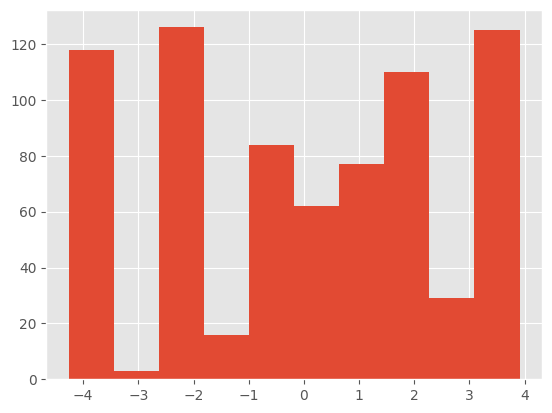

In [ ]:
# NORMALIDAD
plt.hist(resid_val)  # HISTOGRAMA

# Prueba de Shapiro
print(stats.shapiro(reg_mult.resid)) #from scipy import stats

# Prueba de Kolmogorov-Smirnov
ks_stat, ksp_value = stats.kstest(resid_val, 'norm', args=(resid_val.mean(), resid_val.std()))

# 🔹 Mostrar resultados
print(f"Estadístico de Kolmogorov-Smirnov: {ks_stat}")
print(f"Valor p: {ksp_value}")

Desde el histograma ya se puede apreciar que los residuales pueden no seguir una distribución normal ya que no se ve la forma de la campana o un comportamiento similar, para verificarlo se analizará el valor-p de las tres pruebas que se mencionaron.

* Shapiro: 5.749872909366029e-19
* KS: 2.7273979516268223e-10
* Jarque-Bera(Summary): 4.53e-12

En todos los casos es menor al nivel de significancia $\alpha=0.05$, entonces se rechaza la normalidad de los residuales.


In [ ]:
# AUTOCORRELACIÓN
dw_statistic = durbin_watson(reg_mult.resid)

print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.9467550905139017


El valor del estadpistico $DW$ sí es muy cercano a 2, por lo que esto confirma la independencia de los residuales.

## **ANÁLISIS DE RESIDUOS Y SUPUESTOS**

Analizando los residuos, su **QQ-Plot** nos indica una fuerte carga en ambas colas, razón por la cual adquiere esa forma y se desvía de la línea teórica, una razón podrían ser outliers, pero el boxplot es limpio y no contiene ninguno, por lo que no hay normalidad en las colas, por otro lado, al comparar los datos observados y reales, podemos ver que estos sí siguen la línea teórica, al ser tan parecidos, indica que el modelo ajusta bien.

Cumple todos los supuestos a excepción de la normalidad, el histograma no representa una distribución normal, como lo señalaba la curtosis del modelo, se necesita un valor de 3 para indicar normalidad. A pesar de la cantidad de los datos, se realizó una prueba shapiro y kolmogorov, que reafirman esta conclusión, el valor p de ambas pruebas son muy cercanas a cero, lo que rechaza la hipótesis nula, es decir, los datos no provienen de una distribución normal.

## **PRONÓSTICOS**

Una vez que se tiene el modelo, se va a calcular la prima del seguro usando los coeficientes (betas) y se hará un gráfico para visualizar las predicciones.

131    487.647749
203    500.281815
50     488.992682
585    500.035511
138    488.813011
          ...    
653    492.819192
11     497.613527
252    485.749709
521    498.601356
227    502.148534
Length: 250, dtype: float64


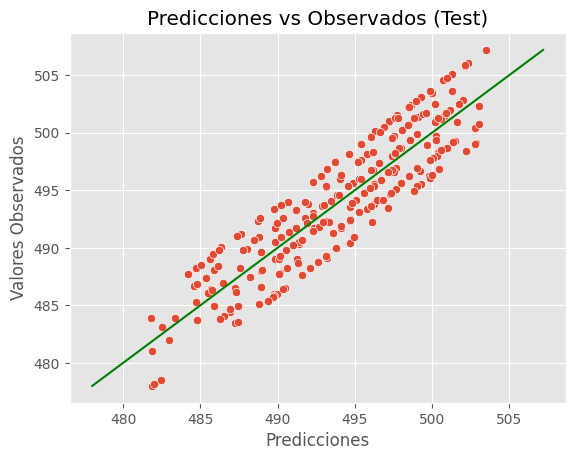

In [ ]:
# Predicciones
predictoras_test=sm.add_constant(predictoras_test)
reg_mult_predicciones = reg_mult.predict(predictoras_test)
print(reg_mult_predicciones)

# Gráfica
sns.scatterplot(x=reg_mult_predicciones, y=respuesta_test)
plt.xlabel("Predicciones")
plt.ylabel("Valores Observados")
plt.title("Predicciones vs Observados (Test)")
plt.plot([respuesta_test.min(), respuesta_test.max()],
 [respuesta_test.min(), respuesta_test.max()], color='green')  # línea
plt.show()

Al igual que con los datos de entrenamiento, se llega a que el modelo obtenido se realizó correctamente pues la línea de regresión rodea en su mayoría a los puntos, mostrando así que no se aleja tanto del comportamiento real.

## **CONCLUSIÓN**

Tiene sentido que las variables de **Edad, Experiencia, Kilometraje, Año de Manufactura y Años de Uso** hayan salido significativas debido a que son datos que involucran directamente al conductor, si son muy jóvenes o muy mayores tienden a tener mayores tasas de siniestralidad, además que la inexperiencia o disminución de reflejos puede afectar notablemente. Además mayor uso del vehículo se relaciona con una mayor exposición al riesgo al igual que el año de fabricación porque si es más viejo puede tener más fallas que uno nuevo.

Todo esto se ve respaldado con el buen ajuste del modelo ($r^2$ alto), sin embargo, se debe tener cuidado porque no cumple con el supuesto de normalidad de los errores. A pesar de esto, se puede dar una buena predicción del costo de la prima del seguro de auto una vez que se aplica a los datos de prueba.

---
# $\color{blue}{\textbf{MODELO CON INTERACCIÓN}}$

Es un modelo que toma en cuenta el efecto combinado de dos o más variables independientes en el resultado, se produce una interacción cuando el efecto de una variable independiente sobre la variable dependiente cambia dependiendo del nivel de otra variable independiente.

$ \mathbf{Y = β_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + ϵ} $

Como propuesta de interacción se va a considerar las variables de **Edad y Experiencia** del conductor ya que algunos efecots se pueden captar en el cálculo de la prima del seguro de autos como que "a mayor edad, también hay más experiencia" o casos donde haya conductores con mucha edad y muy pocos años de experiencia y viceversa. Incluir esta interacción permite capturar este tipo de comportamientos en el modelo y mejorar su capacidad predictiva.


In [ ]:
# Modelo con una Interacción
interaccion = smf.ols("respuesta_train ~Experiencia * Edad",data=predictoras_train).fit()  # ahora se multiplican

# Resumen del Modelo
print(interaccion.summary())

                            OLS Regression Results                            
Dep. Variable:        respuesta_train   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     858.0
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.69e-241
Time:                        16:01:57   Log-Likelihood:                -1835.3
No. Observations:                 750   AIC:                             3679.
Df Residuals:                     746   BIC:                             3697.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          506.1676      0.469  

In [ ]:
# Error cuadrático medio
mse = mean_squared_error(interaccion.model.endog,interaccion.fittedvalues)
print(f"MSE: {mse:.4f}")

MSE: 7.8157


## **ANÁLISIS**

* **Prueba Global:** Hay al menos un coeficente $\beta$ que es diferente de cero ya que el valor-p es de 2.69e-241 (menor al nivel de significancia).

* **Pruebas Individuales:** La variable que contiene la información de la interacción resultó ser "no significativa" porque el valor-p de la prueba con el estadístico t es alto (0.927), por lo que toma el valor de $\beta_3 = 0$.

* **Coeficiente de Determinación:** El $r^2$ y $r^2$ ajustado disminuyen al compararlos con los del modelo de regresión anterior (ahora baja a 77%).

* **Multicolinealidad:** Observemos que su condición es bastante alto (4.32e+03), lo que indica relación entre las variables, cosa que se mencionó en el análisis de correlación

* **Supuestos:** También se puede inferir que sus residuales no siguen una distribución normal, esto por su Prob(JB): 2.58e-06.

* **MSE:** El promedio de los errores es mayor al del modelo anterior.

## **PRONÓSTICOS**

In [ ]:
# Predicciones
predictoras_test = predictoras_test.drop(["Kilometraje_Anual",
                                          "Año_Manufactura","Años_Uso"],axis=1)
predictoras_test.head()


,const,Edad,Experiencia
131,1.0,52,34
203,1.0,19,1
50,1.0,45,27
585,1.0,24,6
138,1.0,43,25


131    485.944243
203    502.220676
50     489.410454
585    499.765037
138    490.399451
          ...    
653    492.099004
11     497.694390
252    484.563126
521    498.289856
227    500.747742
Length: 250, dtype: float64


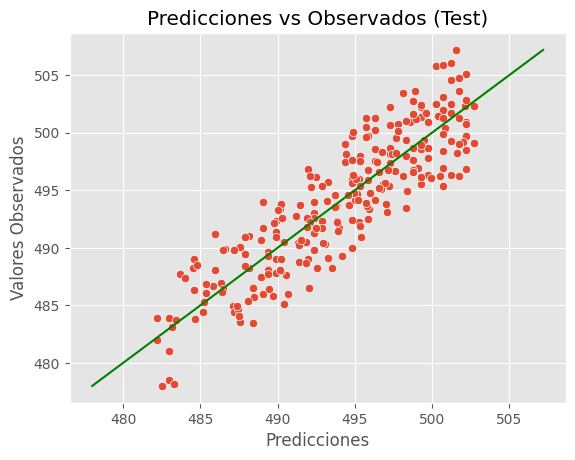

In [ ]:
# Predicciones
interaccion_predicciones = interaccion.predict(predictoras_test)
print(interaccion_predicciones)

# Gráfica
sns.scatterplot(x=interaccion_predicciones, y=respuesta_test)
plt.xlabel("Predicciones")
plt.ylabel("Valores Observados")
plt.title("Predicciones vs Observados (Test)")
plt.plot([respuesta_test.min(), respuesta_test.max()],
 [respuesta_test.min(), respuesta_test.max()], color='green')  # línea
plt.show()

Aquí ya se aprecia que los puntos tienen mayor dispersión al tomar la distancia de separación a la recta propuesta por el modelo con la interacción, sobre todo para los extremos (valores más altos o más bajos de la prima del seguro), así que de manera general perdió poder de predicción.

## **CONCLUSIÓN**

Actuarialmente los resultados de este modelo se pueden interpretar como que las variables de **Edad y Experiencia** no aportan información relevante en conjunto para los cálculos de la prima, esto puede ser debido a que brindan un mejor efecto por separado y también a la correlación que presentan. Al hablar del contexto del planteamiento se puede concluir que una persona mayor con poca experiencia puede pagar lo mismo que una persona joven con mucha experiencia eliminando la interacción que se propuso.

En adición a esto, al ser un modelo que no contempla las demás variables que tienen que ver con el auto pierde poder de predicción reflejado en la gráfica de los pronósticos y también en todos los indicadores como $r^2$ ajustado y MSE.

---
# $\color{blue}{\textbf{MODELO CUADRÁTICO COMPLETO}}$

Un modelo de segundo orden completo contiene todos los términos en un modelo de primer orden y, además, los términos de segundo orden que involucran productos cruzados (términos de interacción) y cuadrados de las variables independientes.

$\mathbf{Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 {X_1}^2 + \beta_4 X_1 X_2 + \beta_5 {X_2}^2 \epsilon }$

Se seguirá utilizando la interacción de **Edad y Experiencia** para poder comparar los resultados de este modelo con los anteriores.

Continuar con estas dos variables dentro del contexto podría ayudar en la predicción de la prima ya que se puede asumir que ni la edad ni la experiencia van a seguir un comportamiento lineal con la probabilidad o severidad de siniestros, además de que se puede dar el escenario donde se llegue a un punto de inflexión con estas variables, es decir, hay una edad o años de experiencia donde el precio disminuya y después comience a aumentar debido a un mayor riesgo. Estos aspectos son los que englobaría un modelo cuadrático.

In [ ]:
poly=PolynomialFeatures(2,include_bias=False)
poly_data=poly.fit_transform(predictoras_train[["Experiencia","Edad"]])

In [ ]:
cuadratico = sm.OLS(respuesta_train, poly_data)
cuadratico = cuadratico.fit()
print(cuadratico.summary())

                                 OLS Regression Results                                
Dep. Variable:           Prima_Seguro   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.930e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                        0.00
Time:                        17:34:17   Log-Likelihood:                         -3888.8
No. Observations:                 750   AIC:                                      7788.
Df Residuals:                     745   BIC:                                      7811.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Error Cuadrático Medio
mse = mean_squared_error(cuadratico.model.endog,cuadratico.fittedvalues)
print(f"MSE: {mse:.4f}")

MSE: 1867.3968


## **ANÁLISIS**

* **Prueba Global:** Hay al menos un coeficente $\beta$ que es diferente de cero ya que el valor-p es de 0.0 (menor al nivel de significancia).

* **Pruebas Individuales:** La variable que contiene la información de la interacción resultó ser "significativa" porque el valor-p de la prueba con el estadístico t es bajo. Por otro lado, la variable de la experiencia al cuadrado no fue significativa, es decir, ese coeficiente se elimina del modelo.

* **Coeficiente de Determinación:** El $r^2$ y $r^2$ ajustado aumenta al compararlo con los modelos anteriores (ahora sube 99%).

* **Multicolinealidad:** Observemos que su condición es bastante alto (1.46e+03), lo que indica relación entre las variables, cosa que se mencionó en el análisis de correlación.

* **Supuestos:** También se puede inferir que sus residuales ya siguen una distribución normal, esto por su Prob(JB):0.498 que superá el nivel de significancia para no rechazar la hipótesis nula. Por otro lado, también hay independencia (DW = 1.931) de los residuales.

* **MSE:** El promedio de los errores supera al de los dos modelos anteriores.

## **PRONÓSTICO**


In [ ]:
# Predicciones
poly_test = poly.transform(predictoras_test[["Experiencia", "Edad"]])
cuadratico_predicciones = cuadratico.predict(poly_test)
print(cuadratico_predicciones)

[494.97438413 436.1239443  492.98848907 453.11570189 491.38287307
 482.12945616 492.24335982 486.7873512  486.7873512  496.01169252
 499.92175294 528.41990189 492.98848907 436.1239443  479.03183912
 456.16798094 446.66507132 486.7873512  518.13149618 474.30392457
 410.04446214 439.2228103  472.71428927 601.68592443 513.98407053
 565.93589992 446.66507132 374.07875193 460.45256546 482.12945616
 354.72594971 479.43848608 469.69901384 504.02389733 472.05914795
 504.29475432 504.45607274 555.92633084 536.81521416 430.34485396
 485.35007701 521.96699552 456.16798094 604.89872338 476.4333437
 432.37952031 435.63535301 436.1239443  444.1713531  489.31582712
 577.75089035 455.32683253 496.43725593 608.8169456  586.69163074
 474.30392457 497.22193517 457.15871763 510.83624914 552.77994394
 472.05914795 592.55686413 436.72530774 497.10565962 577.5211402
 467.22352224 494.53173189 399.82569098 464.63267315 567.61158969
 559.14329199 478.44740534 492.24335982 550.7764948  485.35007701
 443.2667198

Como solo hay dos variables predictoras para calcular el costo de la prima del seguro de auto (experiencia y edad del conductor), estos resultados de las predicciones se pueden ubicar en un gráfico en el espacio debido a que se está generando una función que va de $R^2$ a $R$.

El siguiente código coloca los puntos de los datos reales de prueba en **color rojo** con las coordenadas (experiencia, edad, prima del seguro), y para comparar con las predicciones se generan los **puntos azules** que tienen la forma (experiencia, edad, modelo cuadrático) donde se utilizan los coeficientes que se obtuvieron:

$\mathbf{prima = -19.2065 * experiencia + 31.1652 * edad + 0.3406*edad*experiencia - 0.3969 * edad ^2}$


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Extraer columnas de prueba
edad = predictoras_test["Edad"].values
exp = predictoras_test["Experiencia"].values

# Calcular la prima predicha con los coeficientes
prima_pred = (-19.2065 * exp +
              31.1652 * edad +
              0.3406 * edad * exp +
              -0.3969 * edad**2)

# Crear la figura 3D
fig = go.Figure()

# Superficie de predicción
fig.add_trace(go.Scatter3d(
    x=edad, y=exp, z=prima_pred,
    mode='markers',
    marker=dict(size=3, color='blue'),
    name='Predicción (modelo)'
))

# Puntos reales
fig.add_trace(go.Scatter3d(
    x=edad, y=exp, z=respuesta_test.values,
    mode='markers',
    marker=dict(size=3, color='red'),
    name='Prima real'
))

fig.update_layout(
    title="Predicción vs Datos Reales (Modelo Cuadrático)",
    scene=dict(
        xaxis_title='Edad',
        yaxis_title='Experiencia',
        zaxis_title='Prima'
    ),
    height=700
)

fig.show()


Se puede ver que el modelo no logra predecir correctamente los valores de la prima ya que hay mucha disperisón en las predicciones y los puntos no coiciden en el gráfico realizado en $R^3$, los datos que arroja el modelo están demasiado alejados de lo que ocurre en la realidad, solo una pequeña porción de ellos fue acertada.

## **CONCLUSIÓN**

El modelo con un R^2 de 0.992 es casi perfecto, pero a pesar de esto se puede observar que tiene mucho error. Es importante destacar que todas las variables son significativas, a excepción del término cuadrático para la experiencia.
Como se vio en el modelo anterior, su curtosis implica normalidad de los datos, al igual que su prueba de DB, con un valor muy cercano a 2, recalcando independencia en su residuales, además sus valores AIC y BIC son muy altos debido a la posible falta de información, ya que aunque el modelo parece ajustar de forma excelente a primera vista, ignora las demás variables que como vimos en el primer modelo, también son significativas, se repite el problema con la condición, lo que implica multicolinealidad. De manera general no es un buen modelo que ayude a predecir el valor de la prima.

# $\color{blue}{\textbf{COMPARACIÓN DE MODELOS}}$

Finalmente, en la siguiente tabla se encuentran los criterios más importantes que ayudarán a decidir qué modelo es el que presenta un mejor ajuste.

* **AIC:** Criterio de Akaike
* **BIC:** Criterio de Información Bayesiano
* **R^2 ajustado:** Porcentaje de Variabilidad
* **Error Cuadrático Medio:** Promedio de los Errores

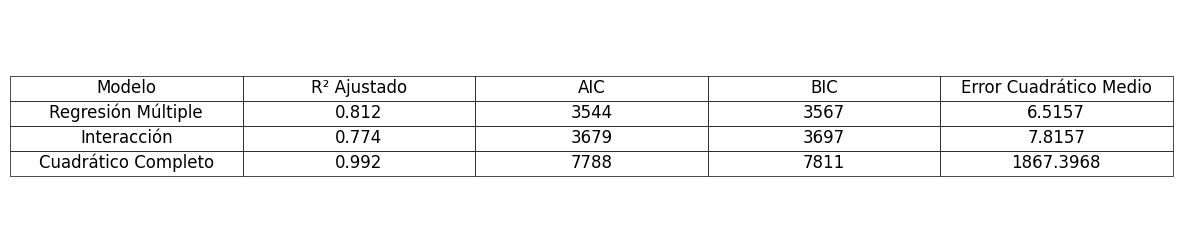

In [ ]:
# Crear DataFrame
data = {
    "Modelo": ["Regresión Múltiple", "Interacción", "Cuadrático Completo"],
    "R² Ajustado": ["0.812", "0.774", "0.992"],
    "AIC": ["3544", "3679", "7788"],
    "BIC": ["3567", "3697", "7811"],
    "Error Cuadrático Medio": ["6.5157", "7.8157", "1867.3968"],
}

df = pd.DataFrame(data)

# Mostrar tabla con más espacio y letra más grande
fig, ax = plt.subplots(figsize=(10, 3))  # Ajusta el tamaño de la figura
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.2]*len(df.columns))  # Ajusta el ancho de las columnas

# Cambiar tamaño de letra
table.auto_set_font_size(False)
table.set_fontsize(12)  # Ajusta el tamaño de la fuente
table.scale(1.5, 1.5)  # Escala la tabla (ancho, alto)

plt.show()


---
# $\color{blue}{\textbf{CONCLUSIONES}}$

A pesar de que el **Modelo Cuadrático** tiene el valor más alto y casi perfecto del $R^2$, tiene mucho error de predicción y ambos criterios de comparación (AIC y BIC) son demasiado altos, lo que implica una pérdida mayor de información, así que no es el mejor modelo que se utilizaría, lo cual se ve respaldado en el gráfico en el espacio, la razón por la cual no es recomendable, es que al aplicarlo a un seguro, no hay muchos filtros para saber qué cliente es bueno o no, se necesita más información tanto de la persona como del auto para concluir si es viable venderle un seguro.

El segundo modelo con la **Interacción** que se propuso es más constante con los resultados, pero como solo toma en cuenta dos variables no es tan preciso en la predicción a menos que se elijan otras, esto debido a sus conclusiones respecto a R^2, curtosis y la correlación entre las variables, en caso de realizar supuestos, probablemente no cumpla ninguno, por lo que tampoco es recomendable para la realización dle seguro.

Por último, el primer modelo de **Regresión Múltiple** que toma en cuenta 5 variables predictoras es el que tiene un porcentaje alto de variabilidad explicada ($R^2 _{adj} = 0.81$), presenta el promedio de error más bajo con 6.5157 y también al comparar los dos criterios de AIC y BIC es el que tiene los valores más bajos. Por lo tanto, de los 3 modelos este es el que tiene un mejor ajuste para predecir el costo de la prima del seguro gracias sus resultados reales y aplicables, su poca pérdida de información y la cantidad de variables tomadas en cuenta para construir el seguro.